### Analysis on 'PAGEOUT' metrics

In [74]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [75]:
#Importing data
df = pd.read_excel('Processed/Final.xlsx',sheetname='PAGEOUT')

In [76]:
#Printing head
df.head()

,rpttime,hmc,server,lpar,metric,value
0,2018-03-19 02:00:00,10.91.74.247,V01SAIXVPVMU1A,a01shrmslmsweb2a,PAGING_PAG,3219
1,2018-03-19 02:20:00,10.92.215.18,v01saixvpvm80a,a01saixvvios200a,PAGING_PAG,3220
2,2018-03-19 02:40:00,10.92.215.18,V01SAIXVPVMU1A,a01shrmslmsweb2a,PAGING_PAG,3221
3,2018-03-19 03:00:00,10.92.215.18,V01SAIXVPVMU1A,a01scvsdb1b,PAGING_PAG,3222
4,2018-03-19 03:20:00,10.92.215.18,V01SAIXVPVMU1A,a01sbncpapp1a,PAGING_PAG,3223


In [77]:
df_needed = df[['rpttime','value']]

In [78]:
#Printing head
df_needed.head()

,rpttime,value
0,2018-03-19 02:00:00,3219
1,2018-03-19 02:20:00,3220
2,2018-03-19 02:40:00,3221
3,2018-03-19 03:00:00,3222
4,2018-03-19 03:20:00,3223


In [79]:
#Printing tail
df_needed.tail()

,rpttime,value
905,2018-03-22 09:20:00,3496
906,2018-03-22 09:40:00,3497
907,2018-03-22 10:00:00,3498
908,2018-03-22 10:20:00,3499
909,2018-03-22 10:40:00,3500


In [86]:
per_70 = int(0.7*length)
print(int(per_70))
per_30 = int(0.3*length)
int(per_30)

637


273

In [88]:
#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df_needed[0:int(0.7*len(df_needed))] 
test=df_needed[int(0.7*len(df_needed)):]

In [31]:
#Aggregating the dataset at daily level


# df_needed.Timestamp = pd.to_datetime(df_needed.rpttime,format='%d-%m-%Y %H:%M') 
# df_needed.index = df_needed.Timestamp 
# df_needed = df_needed.resample('D').mean()
# train.Timestamp = pd.to_datetime(train.rpttime,format='%d-%m-%Y %H:%M') 
# train.index = train.Timestamp 
# train = train.resample('D').mean() 
# test.Timestamp = pd.to_datetime(test.rpttime,format='%d-%m-%Y %H:%M') 
# test.index = test.Timestamp 
# test = test.resample('D').mean()

In [33]:
df_needed.rpttime = pd.to_datetime(df_needed.rpttime,format='%d-%m-%Y %H:%M')
# df_needed.index = df_needed.Timestamp 
df_needed.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,rpttime,value
0,2018-03-19 02:00:00,3219
1,2018-03-19 02:20:00,3220
2,2018-03-19 02:40:00,3221
3,2018-03-19 03:00:00,3222
4,2018-03-19 03:20:00,3223


In [36]:
train.rpttime = pd.to_datetime(train.rpttime,format='%d-%m-%Y %H:%M')
test.rpttime = pd.to_datetime(test.rpttime,format='%d-%m-%Y %H:%M')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


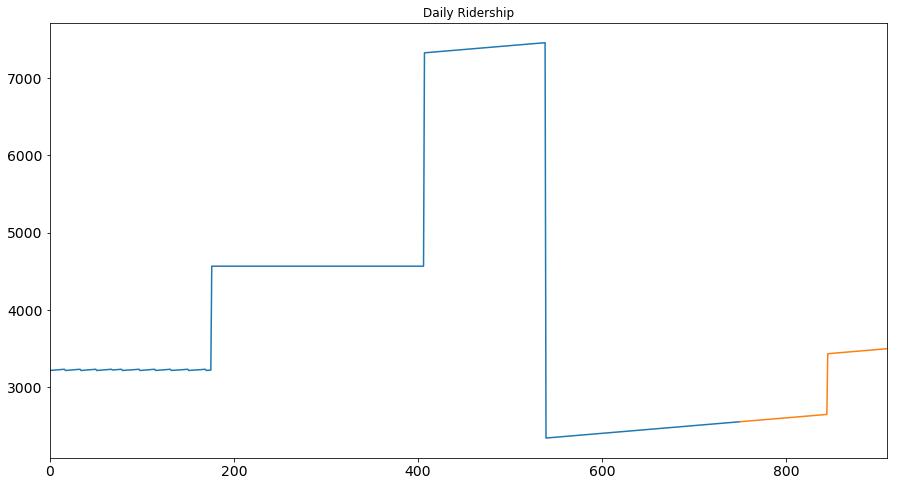

In [38]:
#Plotting data
train.value.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.value.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

### Naive approach

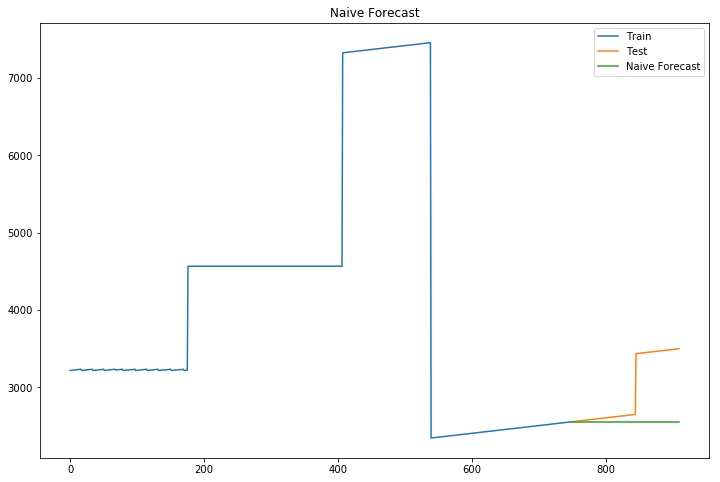

In [39]:
dd= np.asarray(train.value)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['value'], label='Train')
plt.plot(test.index,test['value'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [41]:
#RMSE score
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.value, y_hat.naive))
print(rms)

582.9695532358444


### Simple Average

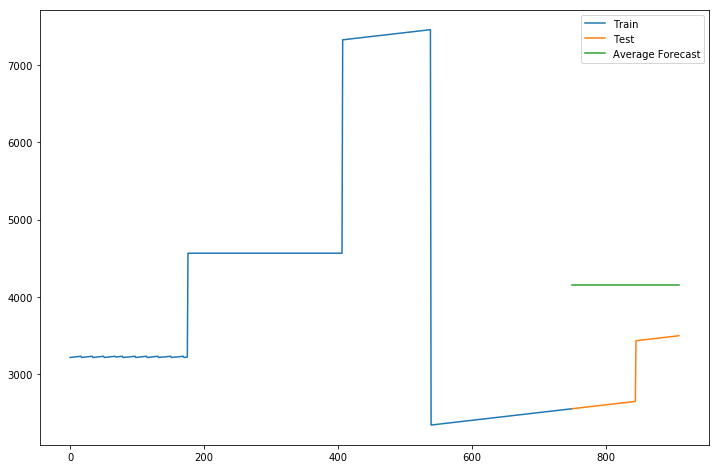

In [42]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['value'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [43]:
#RMSE Score
rms = sqrt(mean_squared_error(test.value, y_hat_avg.avg_forecast))
print(rms)

1272.2655343941024


### Moving Average

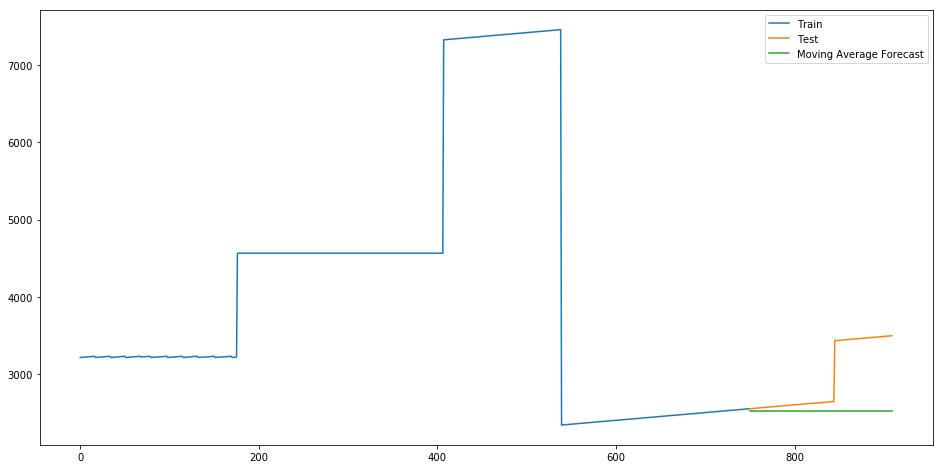

In [45]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['value'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [47]:
#RMSE Score
rms = sqrt(mean_squared_error(test.value, y_hat_avg.moving_avg_forecast))
print(rms)

603.5434947043999


### Simple Exponential Smoothing

In [56]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

ImportError: cannot import name 'ExponentialSmoothing'

In [55]:
# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['value'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

NameError: name 'SimpleExpSmoothing' is not defined

### Holt’s Linear Trend method

In [59]:
import statsmodels.api

ImportError: cannot import name 'PytestTester'

In [61]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

ImportError: cannot import name 'PytestTester'

In [62]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['value'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

NameError: name 'Holt' is not defined

In [64]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [65]:
ts = df_needed['value']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


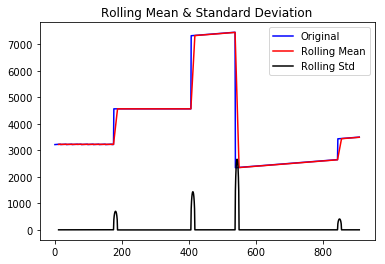

Results of Dickey-Fuller Test:
Test Statistic                  -1.866450
p-value                          0.348005
#Lags Used                       0.000000
Number of Observations Used    909.000000
Critical Value (1%)             -3.437564
Critical Value (5%)             -2.864725
Critical Value (10%)            -2.568466
dtype: float64


In [66]:
test_stationarity(ts)

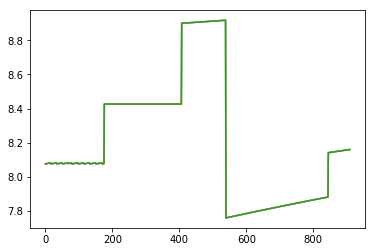

In [69]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


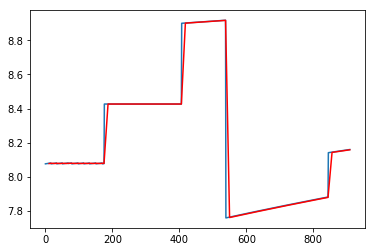

In [70]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

In [71]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11    0.001705
Name: value, dtype: float64

### ARIMA Model

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [43]:
data = pd.read_excel('Processed/Final.xlsx',sheetname='PAGEOUT')
data = data[['rpttime','value']]
print(data.head())
print('\n Data Types:')
print(data.dtypes)

              rpttime  value
0 2018-03-19 02:00:00   3219
1 2018-03-19 02:20:00   3220
2 2018-03-19 02:40:00   3221
3 2018-03-19 03:00:00   3222
4 2018-03-19 03:20:00   3223

 Data Types:
rpttime    datetime64[ns]
value               int64
dtype: object


In [44]:
data.rpttime = pd.to_datetime(data.rpttime,format='%d-%m-%Y %H:%M') 
# data.index = data.rpttime
data.head()

,rpttime,value
0,2018-03-19 02:00:00,3219
1,2018-03-19 02:20:00,3220
2,2018-03-19 02:40:00,3221
3,2018-03-19 03:00:00,3222
4,2018-03-19 03:20:00,3223


In [46]:
data.set_index('rpttime',inplace=True)

In [48]:
data.head()

,value
rpttime,
2018-03-19 02:00:00,3219
2018-03-19 02:20:00,3220
2018-03-19 02:40:00,3221
2018-03-19 03:00:00,3222
2018-03-19 03:20:00,3223


In [49]:
data.index

DatetimeIndex(['2018-03-19 02:00:00', '2018-03-19 02:20:00',
               '2018-03-19 02:40:00', '2018-03-19 03:00:00',
               '2018-03-19 03:20:00', '2018-03-19 03:40:00',
               '2018-03-19 04:00:00', '2018-03-19 04:20:00',
               '2018-03-19 04:40:00', '2018-03-19 05:00:00',
               ...
               '2018-03-22 07:40:00', '2018-03-22 08:00:00',
               '2018-03-22 08:20:00', '2018-03-22 08:40:00',
               '2018-03-22 09:00:00', '2018-03-22 09:20:00',
               '2018-03-22 09:40:00', '2018-03-22 10:00:00',
               '2018-03-22 10:20:00', '2018-03-22 10:40:00'],
              dtype='datetime64[ns]', name='rpttime', length=910, freq=None)

In [50]:
ts = data['value'] 
ts.head(5)

rpttime
2018-03-19 02:00:00    3219
2018-03-19 02:20:00    3220
2018-03-19 02:40:00    3221
2018-03-19 03:00:00    3222
2018-03-19 03:20:00    3223
Name: value, dtype: int64

### Chck stationarity

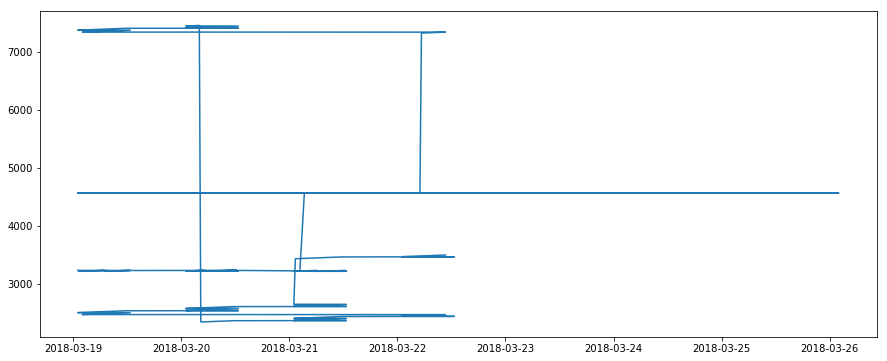

In [51]:
plt.plot(ts)

### Dickey fuller test

In [52]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


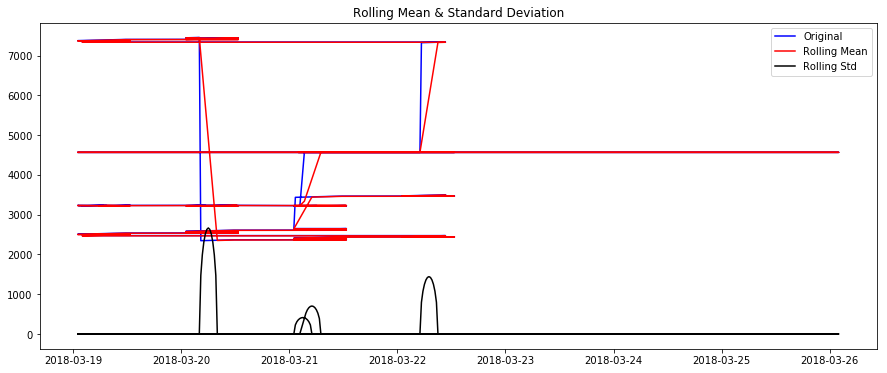

Results of Dickey-Fuller Test:
Test Statistic                  -1.866450
p-value                          0.348005
#Lags Used                       0.000000
Number of Observations Used    909.000000
Critical Value (1%)             -3.437564
Critical Value (5%)             -2.864725
Critical Value (10%)            -2.568466
dtype: float64


In [53]:
test_stationarity(ts)

### Estimating & Elimination Trend

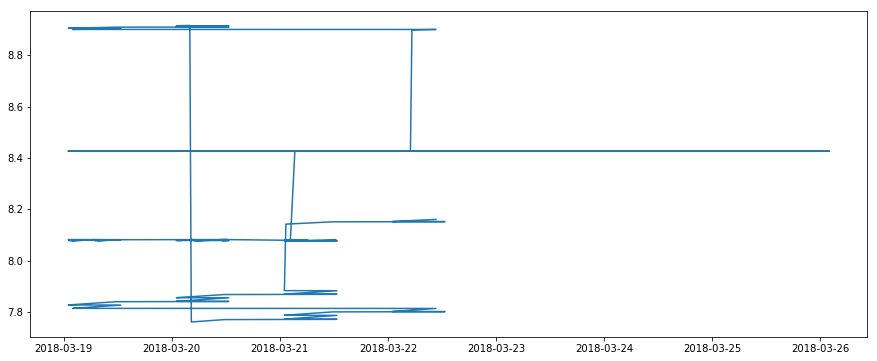

In [54]:
ts_log = np.log(ts)
plt.plot(ts_log)

### Moving Average

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  if __name__ == '__main__':


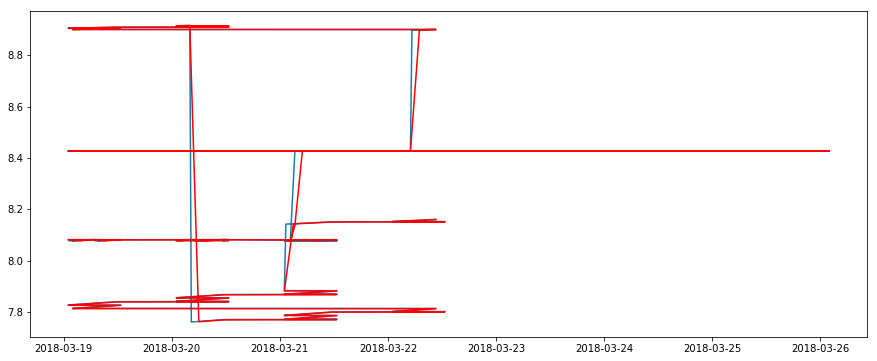

In [55]:
moving_avg = pd.rolling_mean(ts_log,6)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [56]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(6)

rpttime
2018-03-19 02:00:00         NaN
2018-03-19 02:20:00         NaN
2018-03-19 02:40:00         NaN
2018-03-19 03:00:00         NaN
2018-03-19 03:20:00         NaN
2018-03-19 03:40:00    0.000776
Name: value, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


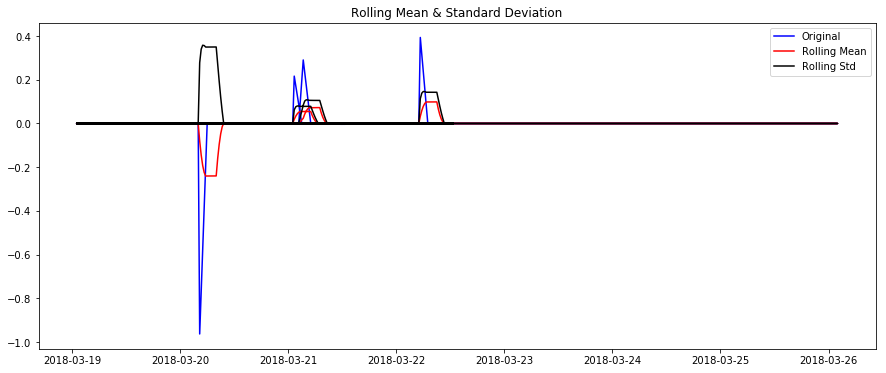

Results of Dickey-Fuller Test:
Test Statistic                -9.680697e+00
p-value                        1.206875e-16
#Lags Used                     5.000000e+00
Number of Observations Used    8.990000e+02
Critical Value (1%)           -3.437645e+00
Critical Value (5%)           -2.864760e+00
Critical Value (10%)          -2.568485e+00
dtype: float64


In [57]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=6,min_periods=0,adjust=True,ignore_na=False).mean()
  if __name__ == '__main__':


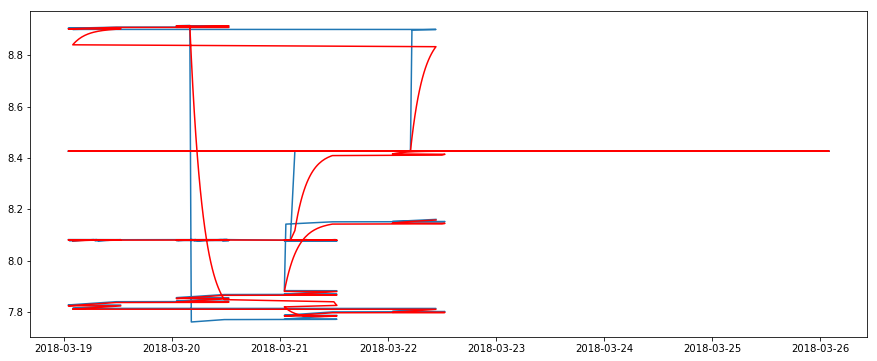

In [58]:
expwighted_avg = pd.ewma(ts_log, halflife=6)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


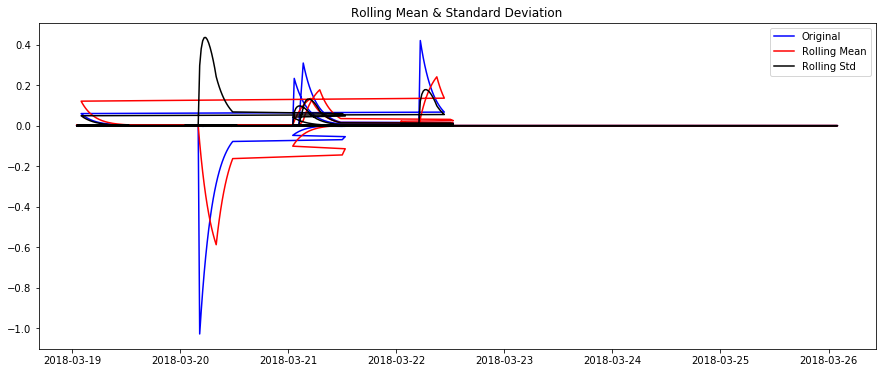

Results of Dickey-Fuller Test:
Test Statistic                -7.249021e+00
p-value                        1.800396e-10
#Lags Used                     0.000000e+00
Number of Observations Used    9.090000e+02
Critical Value (1%)           -3.437564e+00
Critical Value (5%)           -2.864725e+00
Critical Value (10%)          -2.568466e+00
dtype: float64


In [59]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

### Differencing

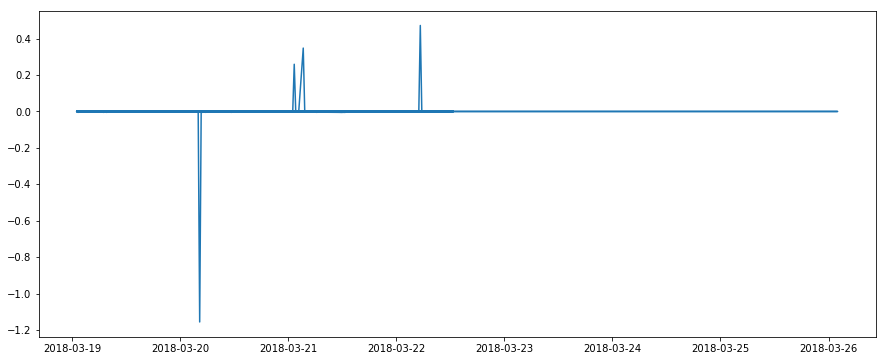

In [60]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


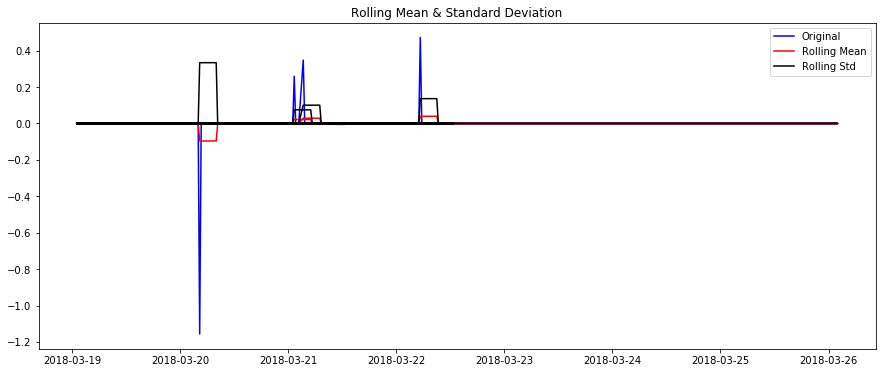

Results of Dickey-Fuller Test:
Test Statistic                 -30.104466
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    908.000000
Critical Value (1%)             -3.437572
Critical Value (5%)             -2.864728
Critical Value (10%)            -2.568468
dtype: float64


In [61]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [62]:
data

,value
rpttime,
2018-03-19 02:00:00,3219
2018-03-19 02:20:00,3220
2018-03-19 02:40:00,3221
2018-03-19 03:00:00,3222
2018-03-19 03:20:00,3223
2018-03-19 03:40:00,3224
2018-03-19 04:00:00,3225
2018-03-19 04:20:00,3226
2018-03-19 04:40:00,3227


In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

In [64]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [65]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=6, method='ols')

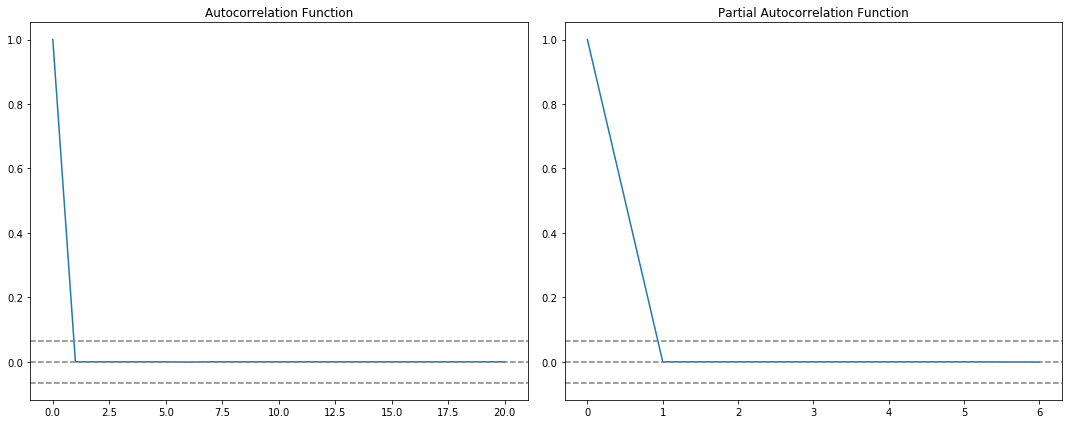

In [66]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### AR Model

In [68]:
from statsmodels.tsa.arima_model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


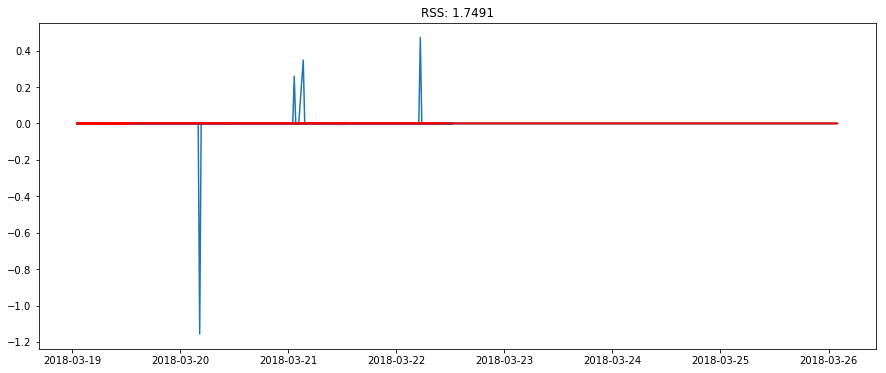

In [72]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


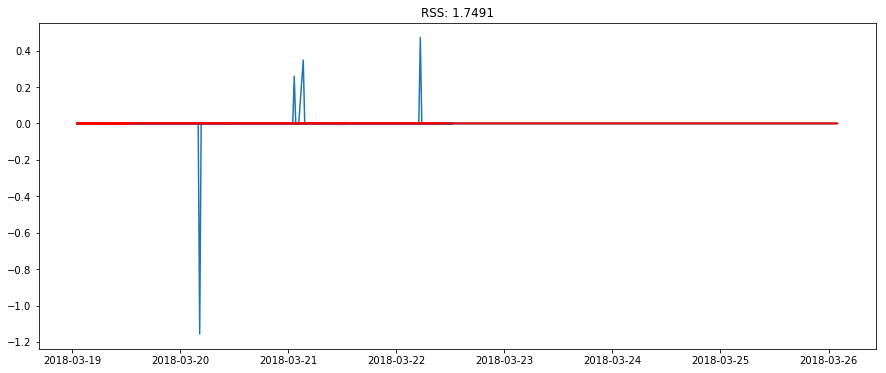

In [70]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### Combined Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


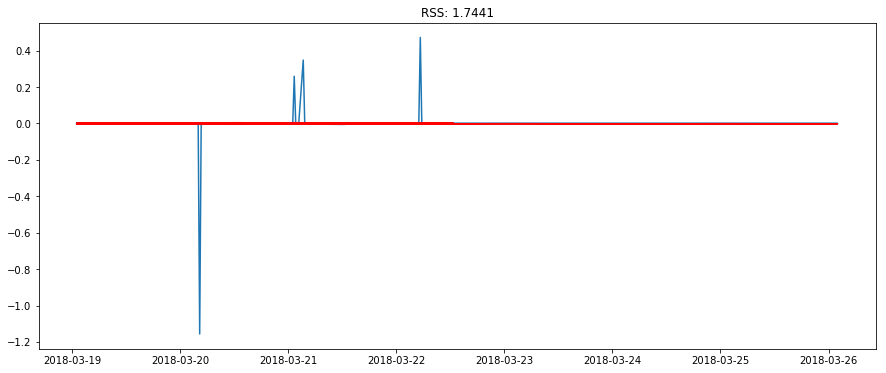

In [71]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [73]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

rpttime
2018-03-19 02:20:00   -0.000124
2018-03-19 02:40:00   -0.000125
2018-03-19 03:00:00   -0.000127
2018-03-19 03:20:00   -0.000127
2018-03-19 03:40:00   -0.000129
dtype: float64
